# Loading data

In [3]:
!git clone https://github.com/SamuelDiai/SGL.git
%cd SGL

Cloning into 'SGL'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 148 (delta 72), reused 96 (delta 34), pack-reused 0
Receiving objects: 100% (148/148), 5.90 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/SGL


In [4]:
!wget -O ./data/cancer.tar.gz https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz 
!tar -xf ./data/cancer.tar.gz -C ./data/ --strip-components=1
!rm ./data/cancer.tar.gz
!mv ./data/data.csv ./data/data_cancer.csv
!mv ./data/labels.csv ./data/label_cancer.csv

import pandas as pd
import numpy as np
df_cancer = pd.read_csv('./data/data_cancer.csv')
y_cancer = pd.read_csv('./data/label_cancer.csv')
df_cancer.drop('Unnamed: 0', axis = 1, inplace = True)
y_cancer.drop('Unnamed: 0', axis = 1, inplace = True)



--2021-04-02 00:27:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72856320 (69M) [application/x-httpd-php]
Saving to: ‘./data/cancer.tar.gz’

./data/cancer.tar.g 100%[===================>]  69.48M  35.2MB/s    in 2.0s    

2021-04-02 00:27:07 (35.2 MB/s) - ‘./data/cancer.tar.gz’ saved [72856320/72856320]



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Two Moons Dataset

Here we show the result of the algorithm for the two moons dataset. Here there are samples in each moon and we use the hyper-parameter k=2 caracterizing the number of component of the graph (approximately). 

Graph statistics:
Nodes:  100 Edges:  619


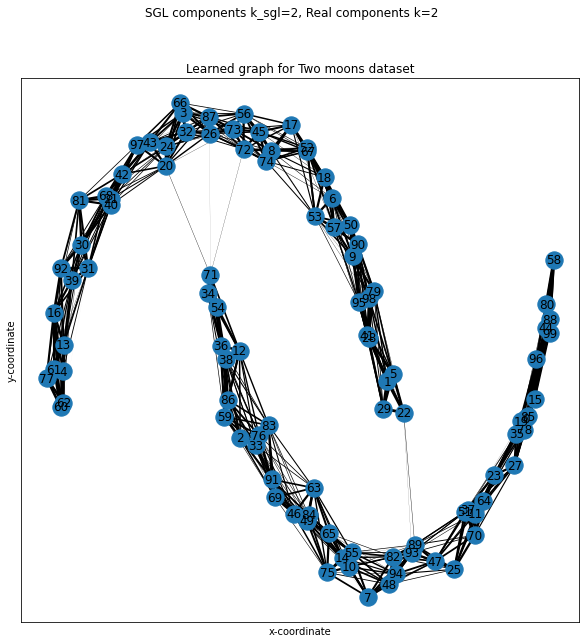

In [6]:
from basic_experiments import two_moons, blops, circles
g_moons = two_moons(n=50, k_sgl=2)

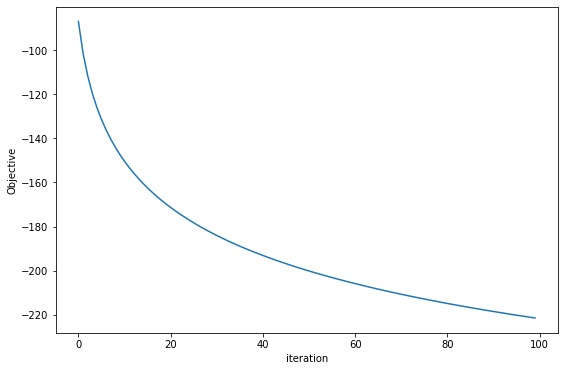

In [7]:
plt.figure(figsize = (9, 6))

plt.plot(g_moons['objective_seq'])
plt.xlabel('iteration')
plt.ylabel('Objective');

# Blops Dataset

Graph statistics:
Nodes:  150 Edges:  720


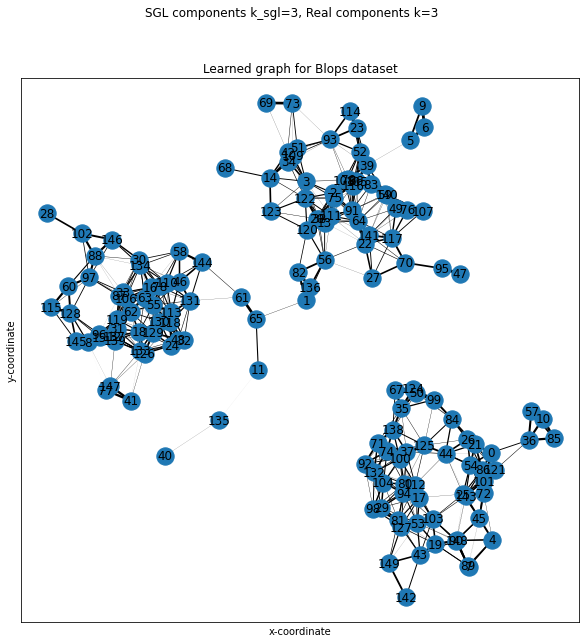

In [8]:
g_blops = blops(n=50, k_sgl=3, k=3)

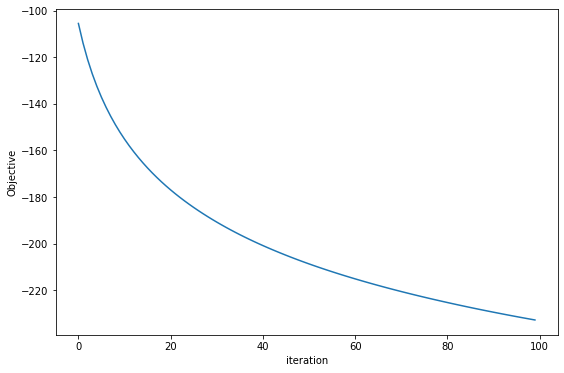

In [9]:
plt.figure(figsize = (9, 6))

plt.plot(g_blops['objective_seq'])
plt.xlabel('iteration')
plt.ylabel('Objective');

# Circle dataset

Graph statistics:
Nodes:  100 Edges:  550


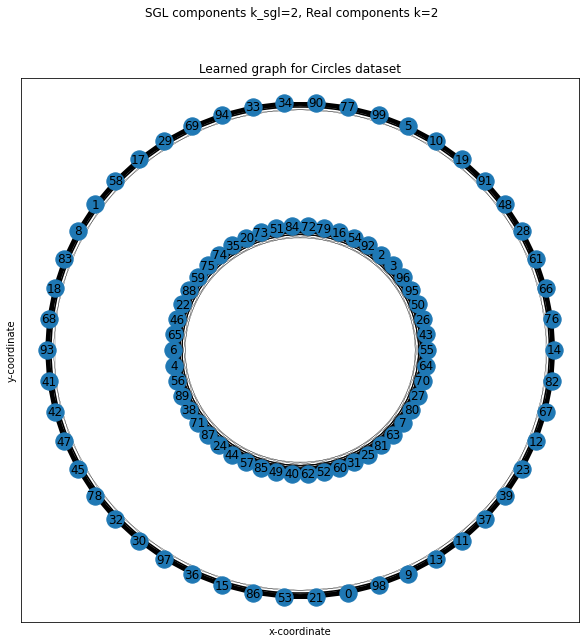

In [17]:
g_circle = circles(n=100, k_sgl=2)

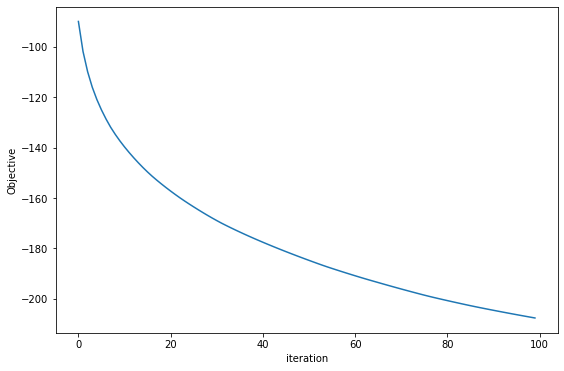

In [18]:
plt.figure(figsize = (9, 6))

plt.plot(g_circle['objective_seq'])
plt.xlabel('iteration')
plt.ylabel('Objective');

# Animals dataset

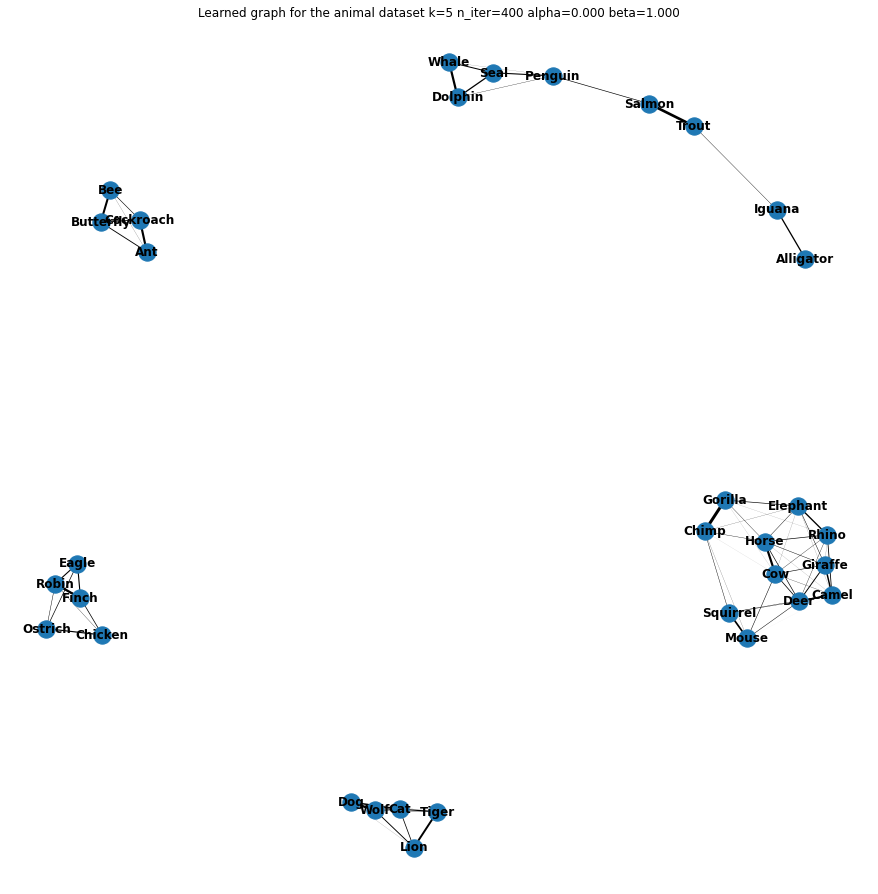

In [12]:
from animals import animals

g_animals = animals(k=5, n_iter=400, alpha=0, beta=1)

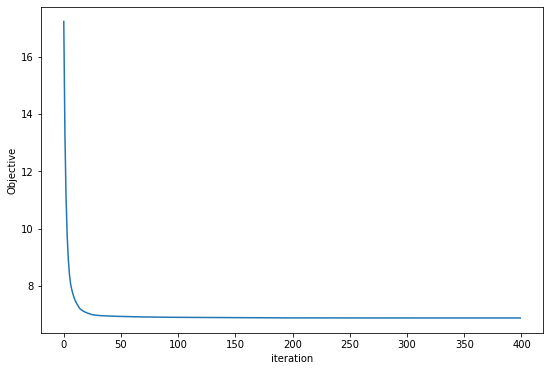

In [13]:
plt.figure(figsize = (9, 6))

plt.plot(g_animals['objective_seq'])
plt.xlabel('iteration')
plt.ylabel('Objective');

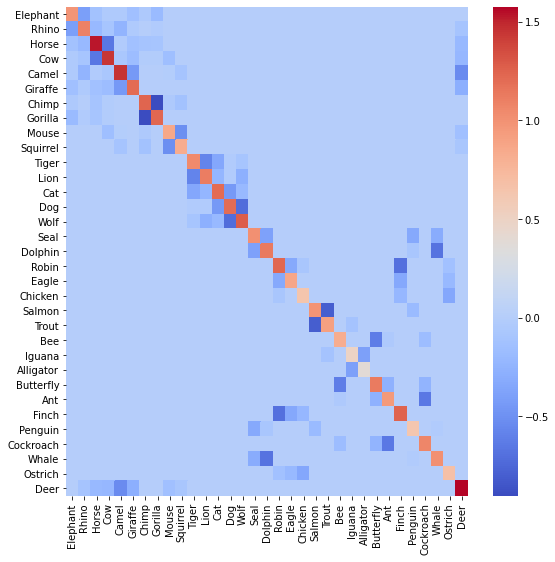

In [14]:
animals_name = ['Elephant', 'Rhino', 'Horse', 'Cow', 'Camel', 'Giraffe', 'Chimp',
                'Gorilla', 'Mouse', 'Squirrel', 'Tiger', 'Lion', 'Cat', 'Dog',
                'Wolf', 'Seal', 'Dolphin', 'Robin', 'Eagle', 'Chicken', 'Salmon',
                'Trout', 'Bee', 'Iguana', 'Alligator', 'Butterfly', 'Ant', 'Finch',
                'Penguin', 'Cockroach', 'Whale', 'Ostrich', 'Deer']

plt.figure(figsize=(9,9))
_ = sns.heatmap(g_animals['laplacian'], cmap="coolwarm",xticklabels=animals_name, yticklabels=animals_name)

# Cancer dataset

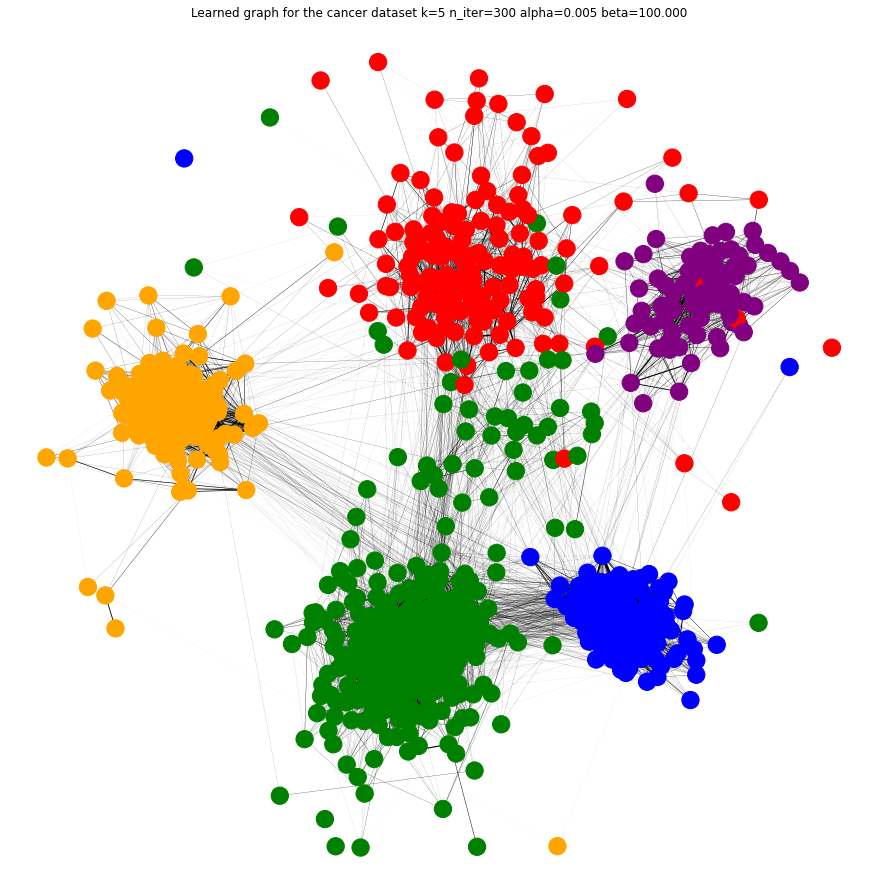

In [15]:
from cancer import Cancer
g = Cancer(df_cancer, y_cancer, alpha=5e-3, beta=100, k=5, n_iter=300)

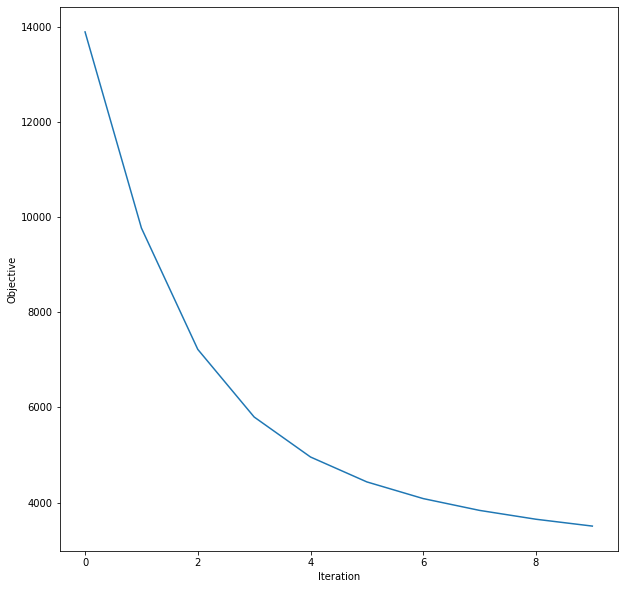

In [16]:
plt.figure(figsize=(10, 10))
_ = plt.plot(g['objective_seq'])
_ = plt.xlabel('Iteration')
_ = plt.ylabel('Objective')